<a href="https://colab.research.google.com/github/sahupra1357/tensorflow/blob/main/Tensorflow_TransferLearning_Finetuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.applications.efficientnet_v2 import EfficientNetV2B0

In [2]:
num_classes = 10
IMG_SIZE = 224
batchsize=32

In [3]:
def create_model():
  inputs = tf.keras.Input((IMG_SIZE,IMG_SIZE,3))
  base_model = EfficientNetV2B0(include_top=False,input_tensor=inputs,weights='imagenet')

  base_model.trainable = False

  x = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
  outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

  model = tf.keras.Model(inputs,outputs, name="TensorflowHUB")
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

  return model

In [4]:
keras_model = create_model()

In [5]:
keras_model.summary()

Model: "TensorflowHUB"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 224, 224, 3)          0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 224, 224, 3)          0         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 stem_conv (Conv2D)          (None, 112, 112, 32)         864       ['normalization[0]

In [6]:
for i,layer in enumerate(keras_model.layers):
  print(i,layer.name,layer.trainable)

0 input_1 False
1 rescaling False
2 normalization False
3 stem_conv False
4 stem_bn False
5 stem_activation False
6 block1a_project_conv False
7 block1a_project_bn False
8 block1a_project_activation False
9 block2a_expand_conv False
10 block2a_expand_bn False
11 block2a_expand_activation False
12 block2a_project_conv False
13 block2a_project_bn False
14 block2b_expand_conv False
15 block2b_expand_bn False
16 block2b_expand_activation False
17 block2b_project_conv False
18 block2b_project_bn False
19 block2b_drop False
20 block2b_add False
21 block3a_expand_conv False
22 block3a_expand_bn False
23 block3a_expand_activation False
24 block3a_project_conv False
25 block3a_project_bn False
26 block3b_expand_conv False
27 block3b_expand_bn False
28 block3b_expand_activation False
29 block3b_project_conv False
30 block3b_project_bn False
31 block3b_drop False
32 block3b_add False
33 block4a_expand_conv False
34 block4a_expand_bn False
35 block4a_expand_activation False
36 block4a_dwconv2 Fals

In [7]:
import os
import zipfile

In [8]:
def unzip_helper(filename):
  # Unzip the downloaded file
  zip_ref = zipfile.ZipFile(filename, "r")
  zip_ref.extractall()
  zip_ref.close()

In [9]:
if os.path.exists("10_food_classes_10_percent.zip"):
  print("the file exists")
else:
  !wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

  unzip_helper("10_food_classes_10_percent.zip")


the file exists


In [10]:
if os.path.exists("10_food_classes_1_percent.zip"):
  print("the 1% file exists")
else:
  !wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip

  unzip_helper("10_food_classes_1_percent.zip")

the 1% file exists


In [11]:
if os.path.exists("10_food_classes_all_data.zip"):
  print("the 1% file exists")
else:
  !wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

  unzip_helper("10_food_classes_all_data.zip")

the 1% file exists


In [12]:
import matplotlib.pyplot as plt
def plot_graphs(model_history):
  loss = model_history['loss']
  val_loss = model_history['val_loss']

  accuracy = model_history['accuracy']
  val_accuracy = model_history['val_accuracy']

  epochs = range(len(loss))

  plt.plot(epochs,loss, label='Training loss')
  plt.plot(epochs,val_loss, label='Validation loss')
  plt.title("Loss")
  plt.xlabel('Epochs')
  plt.legend()

  plt.figure()
  plt.plot(epochs,accuracy, label='Training Accuracy')
  plt.plot(epochs,val_accuracy, label='Validation Accuracy')
  plt.title("Accuracy")
  plt.xlabel('Epochs')
  plt.legend()

In [13]:
!ls

10_food_classes_10_percent	10_food_classes_all_data      sample_data
10_food_classes_10_percent.zip	10_food_classes_all_data.zip  transfer_learning
10_food_classes_1_percent	__MACOSX
10_food_classes_1_percent.zip	modelcheckpointpath


In [14]:
train_directory_1 = '10_food_classes_1_percent/train'
test_directory_1 = '10_food_classes_1_percent/test'

train_directory_10 = '10_food_classes_10_percent/train'
test_directory_10 = '10_food_classes_10_percent/test'

train_directory_all = '10_food_classes_all_data/train'
test_directory_all = '10_food_classes_all_data/test'

In [15]:
train_data_10 = tf.keras.utils.image_dataset_from_directory(train_directory_10,label_mode='categorical',image_size=(IMG_SIZE,IMG_SIZE))
test_data_10 = tf.keras.utils.image_dataset_from_directory(test_directory_10,label_mode='categorical',image_size=(IMG_SIZE,IMG_SIZE))

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [16]:
#keras_model_10_history = keras_model.fit(train_data_10,batch_size=batchsize, epochs=5,steps_per_epoch=len(train_data_10),validation_data=test_data_10,validation_steps=len(test_data_10))
keras_model_10_history = keras_model.fit(train_data_10,batch_size=batchsize, epochs=5,steps_per_epoch=len(train_data_10),validation_data=test_data_10,validation_steps=int(0.25*len(test_data_10)))

Epoch 1/5
24/24 [==============================] - 23s 228ms/step - loss: 1.9810 - accuracy: 0.3387 - val_loss: 1.4173 - val_accuracy: 0.6793
Epoch 2/5
24/24 [==============================] - 4s 169ms/step - loss: 1.2108 - accuracy: 0.7147 - val_loss: 0.9292 - val_accuracy: 0.7878
Epoch 3/5
24/24 [==============================] - 5s 174ms/step - loss: 0.8760 - accuracy: 0.7987 - val_loss: 0.7717 - val_accuracy: 0.8092
Epoch 4/5
24/24 [==============================] - 4s 171ms/step - loss: 0.7215 - accuracy: 0.8267 - val_loss: 0.6797 - val_accuracy: 0.8158
Epoch 5/5
24/24 [==============================] - 5s 179ms/step - loss: 0.6156 - accuracy: 0.8560 - val_loss: 0.6108 - val_accuracy: 0.8372


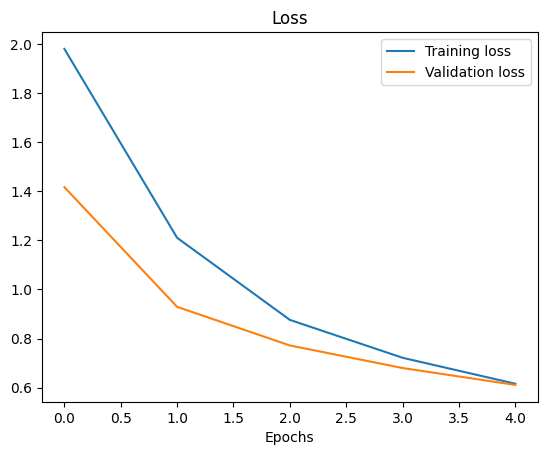

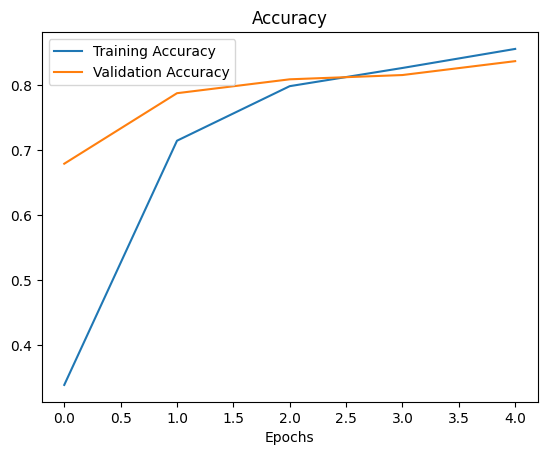

In [17]:
plot_graphs(keras_model_10_history.history)

In [18]:
# Define input tensor shape (same number of dimensions as the output of efficientnetv2-b0)
input_shape = (1, 4, 4, 3)

# Create a random tensor
tf.random.set_seed(42)
input_tensor = tf.random.normal(input_shape)
print(f"Random input tensor:\n {input_tensor}\n")

# Pass the random tensor through a global average pooling 2D layer
global_average_pooled_tensor = tf.keras.layers.GlobalAveragePooling2D()(input_tensor)
print(f"2D global average pooled random tensor:\n {global_average_pooled_tensor}\n")

# Check the shapes of the different tensors
print(f"Shape of input tensor: {input_tensor.shape}")
print(f"Shape of 2D global averaged pooled input tensor: {global_average_pooled_tensor.shape}")

Random input tensor:
 [[[[ 0.3274685  -0.8426258   0.3194337 ]
   [-1.4075519  -2.3880599  -1.0392479 ]
   [-0.5573232   0.539707    1.6994323 ]
   [ 0.28893656 -1.5066116  -0.2645474 ]]

  [[-0.59722406 -1.9171132  -0.62044144]
   [ 0.8504023  -0.40604794 -3.0258412 ]
   [ 0.9058464   0.29855987 -0.22561555]
   [-0.7616443  -1.8917141  -0.93847126]]

  [[ 0.77852213 -0.47338894  0.97772694]
   [ 0.24694404  0.20573746 -0.52562326]
   [ 0.32410017  0.02545409 -0.10638496]
   [-0.63694745  1.1603122   0.2507359 ]]

  [[-0.41728503  0.4012578  -1.4145443 ]
   [-0.5931857  -1.6617213   0.33567193]
   [ 0.10815628  0.23479679 -0.56668764]
   [-0.35819843  0.88698614  0.52744764]]]]

2D global average pooled random tensor:
 [[-0.09368646 -0.45840448 -0.2885598 ]]

Shape of input tensor: (1, 4, 4, 3)
Shape of 2D global averaged pooled input tensor: (1, 3)


In [19]:
# This is the same as GlobalAveragePooling2D()
tf.reduce_mean(input_tensor, axis=[1, 2]) # average across the middle axes

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.09368646, -0.45840448, -0.2885598 ]], dtype=float32)>

In [20]:
class_names = train_data_10.class_names
print(class_names)

['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon', 'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi']


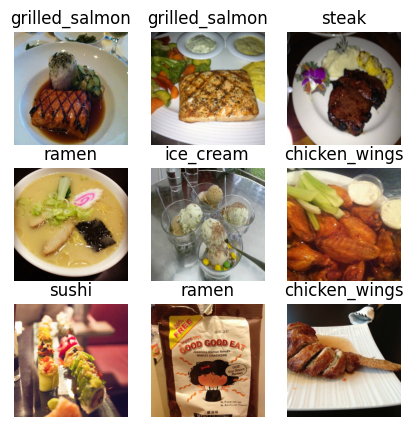

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
for images, labels in train_data_10.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[tf.math.argmax(labels[i])])
    plt.axis("off")

In [22]:
data_agumentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomHeight(0.2),
    tf.keras.layers.RandomWidth(0.2)
], name = 'data_agumentation')

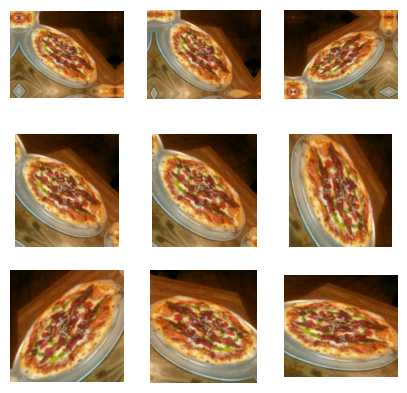

In [23]:
plt.figure(figsize=(5,5))
for images, _ in train_data_10.take(1):
  for i in range(9):
    augmented_images = data_agumentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [24]:
def create_model_augumenation():
  inputs = tf.keras.Input((IMG_SIZE,IMG_SIZE,3))
  aug_data = data_agumentation(inputs)
  base_model = EfficientNetV2B0(include_top=False,input_tensor=aug_data,weights='imagenet')

  base_model.trainable = False

  x = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
  outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

  model = tf.keras.Model(inputs,outputs, name="TensorflowHUB")
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

  return model

In [25]:
keras_model_augumented = create_model_augumenation()

In [26]:
train_data_1 = tf.keras.utils.image_dataset_from_directory(train_directory_1,label_mode='categorical',image_size=(IMG_SIZE,IMG_SIZE))
test_data_1 = tf.keras.utils.image_dataset_from_directory(test_directory_1,label_mode='categorical',image_size=(IMG_SIZE,IMG_SIZE))

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [27]:
keras_model_1_history = keras_model_augumented.fit(train_data_1,batch_size=batchsize, epochs=5,steps_per_epoch=len(train_data_1),validation_data=test_data_1,validation_steps=int(0.25*len(test_data_1)))

Epoch 1/5
3/3 [==============================] - 13s 2s/step - loss: 2.3382 - accuracy: 0.1857 - val_loss: 2.1821 - val_accuracy: 0.2270
Epoch 2/5
3/3 [==============================] - 4s 2s/step - loss: 2.1331 - accuracy: 0.2429 - val_loss: 2.0819 - val_accuracy: 0.2993
Epoch 3/5
3/3 [==============================] - 4s 2s/step - loss: 1.9708 - accuracy: 0.4286 - val_loss: 1.9785 - val_accuracy: 0.3783
Epoch 4/5
3/3 [==============================] - 2s 943ms/step - loss: 1.8779 - accuracy: 0.4857 - val_loss: 1.8810 - val_accuracy: 0.4408
Epoch 5/5
3/3 [==============================] - 2s 1s/step - loss: 1.7572 - accuracy: 0.5286 - val_loss: 1.8038 - val_accuracy: 0.4704


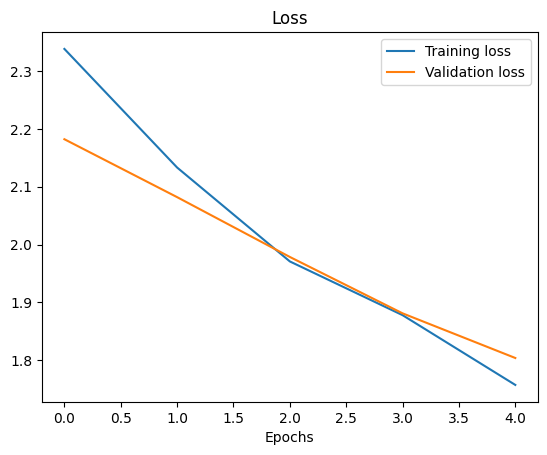

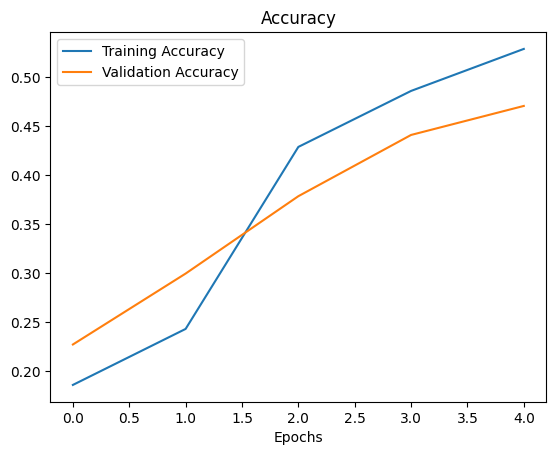

In [28]:
plot_graphs(keras_model_1_history.history)

In [29]:
keras_model_augumented.summary()

Model: "TensorflowHUB"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 data_agumentation (Sequent  (None, None, None, 3)        0         ['input_2[0][0]']             
 ial)                                                                                             
                                                                                                  
 rescaling_1 (Rescaling)     (None, None, None, 3)        0         ['data_agumentation[0][0]']   
                                                                                                  
 normalization_1 (Normaliza  (None, None, None, 3)        0         ['rescaling_1[0][0

In [30]:
input_shape = (224, 224, 3)
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
base_model.trainable = False
inputs = tf.keras.layers.Input(shape=input_shape, name="input_layer")
x = data_agumentation(inputs)
x = base_model(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
outputs = tf.keras.layers.Dense(10, activation="softmax", name="output_layer")(x)

model_11 = tf.keras.Model(inputs, outputs)

model_11.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [31]:
model_11.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_agumentation (Sequent  (None, None, None, 3)     0         
 ial)                                                            
                                                                 
 efficientnetv2-b0 (Functio  (None, None, None, 1280   5919312   
 nal)                        )                                   
                                                                 
 global_average_pooling_lay  (None, 1280)              0         
 er (GlobalAveragePooling2D                                      
 )                                                               
                                                                 
 output_layer (Dense)        (None, 10)                12810 

In [32]:
input_shape = (224, 224, 3)

inputs = tf.keras.layers.Input(shape=input_shape, name="input_layer")
augdata = data_agumentation(inputs)
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False, input_tensor=augdata)
base_model.trainable = False
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(base_model.output)

outputs = tf.keras.layers.Dense(10, activation="softmax", name="output_layer")(x)

model_21 = tf.keras.Model(inputs, outputs)

model_21.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [33]:
model_21.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_layer (InputLayer)    [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 data_agumentation (Sequent  (None, None, None, 3)        0         ['input_layer[0][0]']         
 ial)                                                                                             
                                                                                                  
 rescaling_3 (Rescaling)     (None, None, None, 3)        0         ['data_agumentation[2][0]']   
                                                                                                  
 normalization_3 (Normaliza  (None, None, None, 3)        0         ['rescaling_3[0][0]']   

In [34]:
keras_model_1_1_history = keras_model_augumented.fit(train_data_10,batch_size=batchsize, epochs=5,steps_per_epoch=len(train_data_10),validation_data=test_data_1,validation_steps=int(0.25*len(test_data_1)))

Epoch 1/5
24/24 [==============================] - 12s 452ms/step - loss: 1.6949 - accuracy: 0.4987 - val_loss: 1.3150 - val_accuracy: 0.6842
Epoch 2/5
24/24 [==============================] - 10s 418ms/step - loss: 1.3232 - accuracy: 0.6680 - val_loss: 1.0215 - val_accuracy: 0.7500
Epoch 3/5
24/24 [==============================] - 10s 405ms/step - loss: 1.1002 - accuracy: 0.6973 - val_loss: 0.8668 - val_accuracy: 0.7829
Epoch 4/5
24/24 [==============================] - 9s 374ms/step - loss: 0.9275 - accuracy: 0.7787 - val_loss: 0.7711 - val_accuracy: 0.7911
Epoch 5/5
24/24 [==============================] - 10s 407ms/step - loss: 0.8703 - accuracy: 0.7693 - val_loss: 0.7183 - val_accuracy: 0.7993


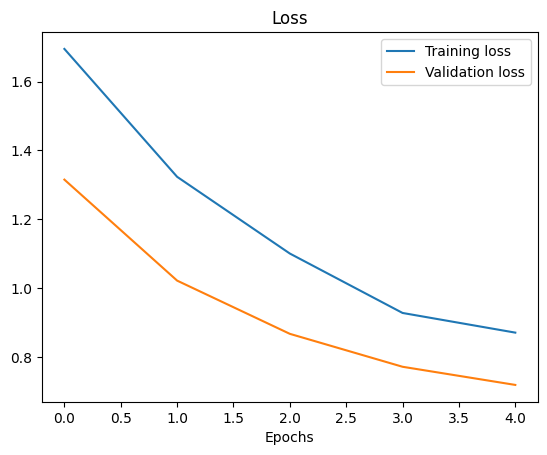

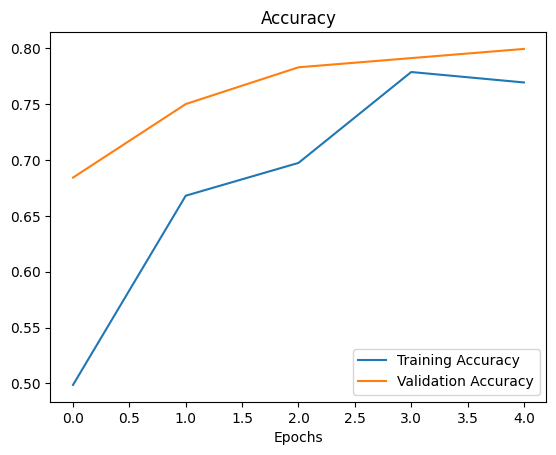

In [35]:
plot_graphs(keras_model_1_1_history.history)

In [36]:
checkpoint_path = 'modelcheckpointpath/checkpoint.ckpt'

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, save_weights_only=True,
                                                         save_best_only=True,
                                                         save_freq="epoch",
                                                         verbose=1)

## Fine Tuning

In [37]:
def create_model_final(lr=0.001):
  base_model = EfficientNetV2B0(include_top=False)
  base_model.trainable = False

  inputs = tf.keras.Input((IMG_SIZE,IMG_SIZE,3))
  x = data_agumentation(inputs)
  x = base_model(x, training=False)
  x = tf.keras.layers.GlobalAveragePooling2D()(x)
  outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

  model = tf.keras.Model(inputs,outputs)
  #model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  model.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
                metrics=['accuracy'])
  return model


In [38]:
model_1 = create_model_final()

In [39]:
# Create tensorboard callback (functionized because need to create a new one for each model)
import datetime
def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

In [40]:
initial_epochs  =5

In [41]:
history_1 = model_1.fit(train_data_10,
                        epochs=initial_epochs,
                        validation_data=test_data_10,
                        validation_steps=(0.25*len(test_data_10)),
                        callbacks=[create_tensorboard_callback("transfer_learning", "10_percent_data_aug"),
                                                     checkpoint_callback])

Saving TensorBoard log files to: transfer_learning/10_percent_data_aug/20231213-215003
Epoch 1/5
24/24 [==============================] - ETA: 0s - loss: 2.0420 - accuracy: 0.3107
Epoch 1: val_loss improved from inf to 1.51667, saving model to modelcheckpointpath/checkpoint.ckpt
24/24 [==============================] - 26s 721ms/step - loss: 2.0420 - accuracy: 0.3107 - val_loss: 1.5167 - val_accuracy: 0.6203
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 1.4284 - accuracy: 0.6067
Epoch 2: val_loss improved from 1.51667 to 1.06743, saving model to modelcheckpointpath/checkpoint.ckpt
24/24 [==============================] - 14s 586ms/step - loss: 1.4284 - accuracy: 0.6067 - val_loss: 1.0674 - val_accuracy: 0.7500
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 1.1513 - accuracy: 0.7093
Epoch 3: val_loss improved from 1.06743 to 0.87118, saving model to modelcheckpointpath/checkpoint.ckpt
24/24 [==============================] - 13s 544ms/step - loss

In [42]:
# Evaluate on the test data
results_10_percent_data_aug = model_1.evaluate(test_data_10)
results_10_percent_data_aug

79/79 [==============================] - 6s 69ms/step - loss: 0.6607 - accuracy: 0.8324


[0.6606838703155518, 0.8324000239372253]

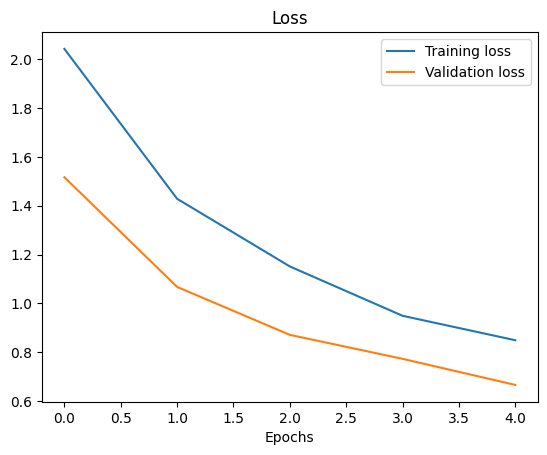

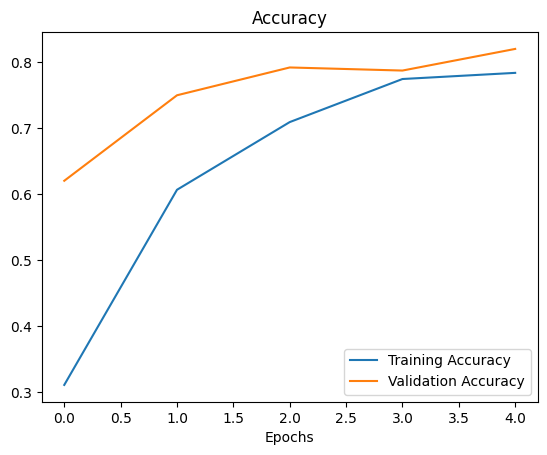

In [43]:
plot_graphs(history_1.history)

In [44]:
model_1.load_weights(checkpoint_path)
loaded_weights_model_results = model_1.evaluate(test_data_10)

79/79 [==============================] - 6s 63ms/step - loss: 0.6607 - accuracy: 0.8324


In [45]:
results_10_percent_data_aug == loaded_weights_model_results

True

In [46]:
import numpy as np
# Check to see if loaded model results are very close to native model results (should output True)
np.isclose(np.array(results_10_percent_data_aug), np.array(loaded_weights_model_results))

array([ True,  True])

In [47]:
# Check the difference between the two results (small values)
print(np.array(results_10_percent_data_aug) - np.array(loaded_weights_model_results))

[0. 0.]


In [48]:
model_1.layers

In [49]:
for i, layer in enumerate(model_1.layers):
  print(i, layer.name)

0 input_5
1 data_agumentation
2 efficientnetv2-b0
3 global_average_pooling2d_3
4 dense_2


In [50]:
# Access the base_model layers of model_2
model_1_base_model = model_1.layers[2]
model_1_base_model.name

'efficientnetv2-b0'

In [51]:
model_1_base_model.trainable

False

In [52]:
len(model_1_base_model.trainable_variables)

0

In [53]:
model_1_base_model.trainable=True

for layer in model_1_base_model.layers[:-10]:
  layer.trainable = False

In [54]:
model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics=["accuracy"])

In [55]:
for layer_number, layer in enumerate(model_1_base_model.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_4 False
1 rescaling_4 False
2 normalization_4 False
3 stem_conv False
4 stem_bn False
5 stem_activation False
6 block1a_project_conv False
7 block1a_project_bn False
8 block1a_project_activation False
9 block2a_expand_conv False
10 block2a_expand_bn False
11 block2a_expand_activation False
12 block2a_project_conv False
13 block2a_project_bn False
14 block2b_expand_conv False
15 block2b_expand_bn False
16 block2b_expand_activation False
17 block2b_project_conv False
18 block2b_project_bn False
19 block2b_drop False
20 block2b_add False
21 block3a_expand_conv False
22 block3a_expand_bn False
23 block3a_expand_activation False
24 block3a_project_conv False
25 block3a_project_bn False
26 block3b_expand_conv False
27 block3b_expand_bn False
28 block3b_expand_activation False
29 block3b_project_conv False
30 block3b_project_bn False
31 block3b_drop False
32 block3b_add False
33 block4a_expand_conv False
34 block4a_expand_bn False
35 block4a_expand_activation False
36 block4a_dwconv2 

In [56]:
print(len(model_1.trainable_variables))

12


In [57]:
# Fine tune for another 5 epochs
fine_tune_epochs = initial_epochs + 5

# Refit the model (same as model_2 except with more trainable layers)
history_fine_10_percent_data_aug = model_1.fit(train_data_10,
                                               epochs=fine_tune_epochs,
                                               validation_data=train_data_10,
                                               initial_epoch=history_1.epoch[-1],
                                               validation_steps=int(0.25 * len(test_data_10)),
                                               callbacks=[create_tensorboard_callback("transfer_learning", "10_percent_fine_tune_last_10")])

Saving TensorBoard log files to: transfer_learning/10_percent_fine_tune_last_10/20231213-215146
Epoch 5/10
24/24 [==============================] - 24s 571ms/step - loss: 0.7158 - accuracy: 0.8000 - val_loss: 0.5222 - val_accuracy: 0.8503
Epoch 6/10
24/24 [==============================] - 14s 579ms/step - loss: 0.6235 - accuracy: 0.8120 - val_loss: 0.4477 - val_accuracy: 0.8635
Epoch 7/10
24/24 [==============================] - 10s 393ms/step - loss: 0.5599 - accuracy: 0.8333 - val_loss: 0.4202 - val_accuracy: 0.8799
Epoch 8/10
24/24 [==============================] - 10s 404ms/step - loss: 0.5239 - accuracy: 0.8213 - val_loss: 0.4307 - val_accuracy: 0.8701
Epoch 9/10
24/24 [==============================] - 10s 395ms/step - loss: 0.4692 - accuracy: 0.8440 - val_loss: 0.3815 - val_accuracy: 0.8882
Epoch 10/10
24/24 [==============================] - 9s 356ms/step - loss: 0.4222 - accuracy: 0.8587 - val_loss: 0.3404 - val_accuracy: 0.8931


In [58]:
# Evaluate the model on the test data
results_fine_tune_10_percent = model_1.evaluate(train_data_10)

24/24 [==============================] - 2s 61ms/step - loss: 0.3589 - accuracy: 0.8893


In [59]:
import matplotlib.pyplot as plt
def plot_compare_graphs(original_history, new_history, initial_epochs=5):
  loss = original_history['loss']
  val_loss = original_history['val_loss']

  accuracy = original_history['accuracy']
  val_accuracy = original_history['val_accuracy']

  print(len(accuracy))

  toal_loss = loss + new_history['loss']
  toal_val_loss = val_loss + new_history['val_loss']

  toal_accuracy = accuracy + new_history['accuracy']
  toal_val_accuracy = val_accuracy + new_history['val_accuracy']

  print(len(toal_accuracy))

  plt.figure(figsize=(6, 6))
  plt.subplot(2, 1, 1)
  plt.plot(toal_accuracy, label='Training Accuracy')
  plt.plot(toal_val_accuracy, label='Validation Accuracy')
  plt.plot([initial_epochs-1, initial_epochs-1],
            plt.ylim(), label='Start Fine Tuning')
  plt.legend(loc='lower right')
  plt.title('Training and Validation Accuracy')

  plt.subplot(2, 1, 2)
  plt.plot(toal_loss, label='Training Loss')
  plt.plot(toal_val_loss, label='Validation Loss')
  plt.plot([initial_epochs-1, initial_epochs-1],
            plt.ylim(), label='Start Fine Tuning')
  plt.legend(loc='upper right')
  plt.title('Training and Validation Loss')
  plt.xlabel('epoch')
  plt.show()

5
11


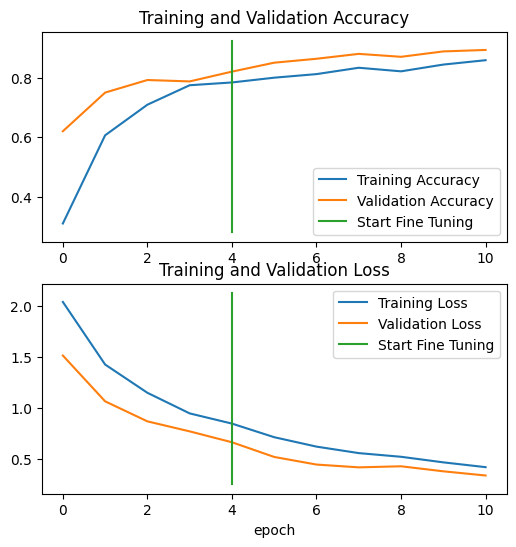

In [60]:
plot_compare_graphs(history_1.history,history_fine_10_percent_data_aug.history,initial_epochs=5)

In [61]:
train_data_all = tf.keras.utils.image_dataset_from_directory(train_directory_all,label_mode='categorical',image_size=(IMG_SIZE,IMG_SIZE))
test_data_all = tf.keras.utils.image_dataset_from_directory(test_directory_all,label_mode='categorical',image_size=(IMG_SIZE,IMG_SIZE))

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [62]:
model_1 = create_model_final(lr=0.0001)

In [63]:
model_1.load_weights(checkpoint_path)

In [64]:
model_1.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 data_agumentation (Sequent  (None, None, None, 3)     0         
 ial)                                                            
                                                                 
 efficientnetv2-b0 (Functio  (None, None, None, 1280   5919312   
 nal)                        )                                   
                                                                 
 global_average_pooling2d_4  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_3 (Dense)             (None, 10)                12810     
                                                           

In [65]:
print(len(model_1.trainable_variables))

2


In [66]:
model_1.evaluate(test_data_all)

79/79 [==============================] - 8s 61ms/step - loss: 0.6607 - accuracy: 0.8324


[0.6606839299201965, 0.8324000239372253]

In [67]:
for layer_number, layer in enumerate(model_1.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_7 True
1 data_agumentation False
2 efficientnetv2-b0 False
3 global_average_pooling2d_4 True
4 dense_3 True


In [68]:
# Unfreeze the top 10 layers in model_2's base_model
model_1_base_model = model_1.layers[2]
model_1_base_model.trainable = True

# Freeze all layers except for the last 10
for layer in model_1_base_model.layers[:-10]:
  layer.trainable = False

In [69]:
for layer_number, layer in enumerate(model_1_base_model.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_6 False
1 rescaling_5 False
2 normalization_5 False
3 stem_conv False
4 stem_bn False
5 stem_activation False
6 block1a_project_conv False
7 block1a_project_bn False
8 block1a_project_activation False
9 block2a_expand_conv False
10 block2a_expand_bn False
11 block2a_expand_activation False
12 block2a_project_conv False
13 block2a_project_bn False
14 block2b_expand_conv False
15 block2b_expand_bn False
16 block2b_expand_activation False
17 block2b_project_conv False
18 block2b_project_bn False
19 block2b_drop False
20 block2b_add False
21 block3a_expand_conv False
22 block3a_expand_bn False
23 block3a_expand_activation False
24 block3a_project_conv False
25 block3a_project_bn False
26 block3b_expand_conv False
27 block3b_expand_bn False
28 block3b_expand_activation False
29 block3b_project_conv False
30 block3b_project_bn False
31 block3b_drop False
32 block3b_add False
33 block4a_expand_conv False
34 block4a_expand_bn False
35 block4a_expand_activation False
36 block4a_dwconv2 

In [70]:
model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics=["accuracy"])

In [71]:
fine_tune_epochs = initial_epochs + 5

history_fine_10_classes_full = model_1.fit(train_data_all,
                                           epochs=fine_tune_epochs,
                                           initial_epoch=history_1.epoch[-1],
                                           validation_data=test_data_all,
                                           validation_steps=int(0.25 * len(test_data_all)),
                                           callbacks=[create_tensorboard_callback("transfer_learning", "full_10_classes_fine_tune_last_10")])

Saving TensorBoard log files to: transfer_learning/full_10_classes_fine_tune_last_10/20231213-215324
Epoch 5/10
235/235 [==============================] - 72s 270ms/step - loss: 0.7148 - accuracy: 0.7713 - val_loss: 0.4047 - val_accuracy: 0.8553
Epoch 6/10
235/235 [==============================] - 61s 255ms/step - loss: 0.5997 - accuracy: 0.8144 - val_loss: 0.3252 - val_accuracy: 0.8931
Epoch 7/10
235/235 [==============================] - 50s 211ms/step - loss: 0.5379 - accuracy: 0.8296 - val_loss: 0.3076 - val_accuracy: 0.8980
Epoch 8/10
235/235 [==============================] - 47s 197ms/step - loss: 0.4980 - accuracy: 0.8348 - val_loss: 0.3195 - val_accuracy: 0.8964
Epoch 9/10
235/235 [==============================] - 42s 177ms/step - loss: 0.4773 - accuracy: 0.8451 - val_loss: 0.2843 - val_accuracy: 0.9112
Epoch 10/10
235/235 [==============================] - 39s 161ms/step - loss: 0.4583 - accuracy: 0.8497 - val_loss: 0.3003 - val_accuracy: 0.9013


5
11


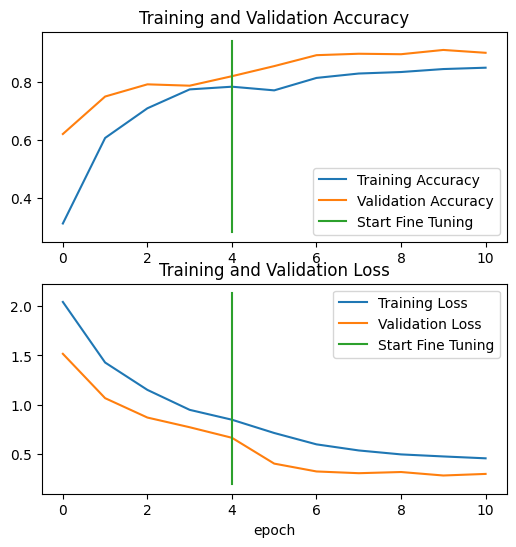

In [72]:
plot_compare_graphs(history_1.history,history_fine_10_classes_full.history,initial_epochs=5)

In [73]:
results_fine_tune_full_data = model_1.evaluate(test_data_all)
results_fine_tune_full_data

79/79 [==============================] - 7s 76ms/step - loss: 0.2754 - accuracy: 0.9096


[0.2754310667514801, 0.909600019454956]

In [74]:
%tensorboard --logdir {'transfer_learning'}

UsageError: Line magic function `%tensorboard` not found.
